# Import Libraries

In [1]:
from swarmintelligence import ParticleSwarmOptimization, Utilization
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import time # calculate CPU time
import pickle

# import package metrics
from sewar.full_ref import *

# Load Data Training

In [2]:
# load the model from disk
train_dataset_misc = pickle.load(open('datasets/train_dataset.pkl', 'rb'))
gray_misc_dataset = train_dataset_misc['gray']
example_gray_scale_image =gray_misc_dataset[0]

In [3]:
gray_misc_dataset

[array([[ 38,  40,  47, ...,  34,  32,  32],
        [ 46,  49,  41, ..., 183, 140, 129],
        [ 48,  45,  91, ..., 254, 254, 255],
        ...,
        [ 59,  63,  75, ...,  85,  84,  83],
        [ 72,  71,  64, ...,  85,  84,  83],
        [ 74,  51,  38, ...,  84,  83,  84]], dtype=uint8),
 array([[ 81,  78,  76, ...,  32,  27,  28],
        [ 83,  81,  78, ...,  26,  31,  29],
        [ 83,  81,  79, ...,  29,  29,  29],
        ...,
        [108, 111, 110, ...,  42,  44,  38],
        [116, 116, 119, ...,  47,  39,  36],
        [116, 114, 126, ...,  45,  42,  37]], dtype=uint8),
 array([[ 58,  98,  80, ..., 196, 199, 198],
        [ 73, 108, 104, ..., 198, 200, 198],
        [ 88, 111,  81, ..., 199, 199, 199],
        ...,
        [124, 145, 133, ...,  90,  84,  85],
        [108, 113, 117, ...,  92,  88,  98],
        [ 96, 102, 112, ..., 107,  97, 107]], dtype=uint8),
 array([[ 45,  61, 118, ..., 127, 123, 121],
        [ 50,  83, 126, ..., 127, 124, 126],
        [ 60, 11

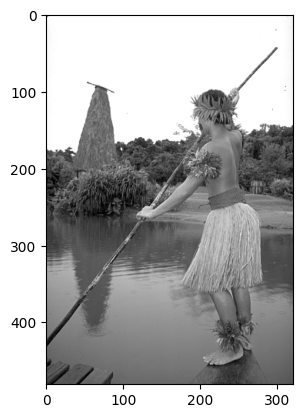

In [4]:
plt.imshow(example_gray_scale_image,cmap='gray')

# Grid Search PSO Parameter

## Define Grid Search Parameter

In [5]:
# default params
k = 5
fitness_function = 'otsu'
obj='max'

# define by user
# inertias = [0.5, 0.7, 0.9]

n_particles = [25]
maxIteration = [100]
phi1s = [2.2, 2.4, 2.6, 2.8]
phi2s = [1.1, 1.3, 1.5, 1.7]
inertias = [0.5, 0.8]

## Do a Gridsearch
***
- Find the best PSO Parameter Combination

***
**Metrics Performances** <br>
1. 5 Train images will be used to train the model and get the average of some metrics
2. Metrics: <br>
- Average CPU time
- Average Fitness
- Average MSE
- Average RMSE
- Average PSNR
- Average SSIM
- Average UQI

In [6]:
gridsearch_results = {
    'combinations': [],
    'k':[],
    'populations':[],
    'max_iteration':[],
    'phi1':[],
    'phi2':[],
    'inertia':[],
    'fitness_function':[],
    'obj':[],
    'Mean CPU_time (seconds)': [],
    'Mean Fitness':[],
    'Mean MSE':[],
    'Mean RMSE':[],
    'Mean PSNR':[],
    'Mean SSIM':[],
    'Mean UQI':[],
}

In [7]:
for n_particle in n_particles:
    for max_iteration in maxIteration:
        for phi1 in phi1s:
            for phi2 in phi2s:
                for inertia in inertias:
                    cpu_time = []
                    fitness_values = []
                    list_mse = []
                    list_rmse = []
                    list_psnr = []
                    list_ssim = []
                    list_uqi = []
                    combination_name = "Particle-"+str(n_particle)+"_MaxIter-"+str(
                        max_iteration)+"_Phi1-"+str(phi1)+"_Phi2-"+str(phi2)+"_Inertia-"+str(inertia)
                    
                    # train the model using data train
                    for train_image in gray_misc_dataset:
                        pso = ParticleSwarmOptimization(
                            k=k,
                            particleSize=n_particle,
                            maxIteration=max_iteration,
                            fitness_function='otsu',
                            phi1=phi1,
                            phi2=phi2,
                            inertia=inertia
                        )
                        # get the start time
                        st = time.time()
                        particles, best_thresholds = pso.fit_run(train_image)
                        # get the end time
                        et = time.time()
                        regions = Utilization().digitize(train_image, best_thresholds)
                        
                        # calculate the metrics
                        fitness_values.append(pso.get_params_training_()['best_fitness_tracking'][-1])
                        cpu_time.append(et-st)
                        list_mse.append(mse(train_image,regions))
                        list_rmse.append(rmse(train_image,regions))
                        list_psnr.append(psnr(train_image,regions))
                        list_ssim.append(ssim(train_image,regions))
                        list_uqi.append(uqi(train_image,regions))
                    
                    # get the average and then append to dataframe
                    gridsearch_results['combinations'].append(combination_name)
                    gridsearch_results['k'].append(k)
                    gridsearch_results['populations'].append(n_particle)
                    gridsearch_results['max_iteration'].append(max_iteration)
                    gridsearch_results['phi1'].append(phi1)
                    gridsearch_results['phi2'].append(phi2)
                    gridsearch_results['inertia'].append(inertia)
                    gridsearch_results['fitness_function'].append(fitness_function)
                    gridsearch_results['obj'].append(obj)
                    gridsearch_results['Mean CPU_time (seconds)'].append(np.mean(np.array(cpu_time)))
                    gridsearch_results['Mean Fitness'].append(np.mean(np.array(fitness_values)))
                    gridsearch_results['Mean MSE'].append(np.mean(np.array(list_mse)))
                    gridsearch_results['Mean RMSE'].append(np.mean(np.array(list_rmse)))
                    gridsearch_results['Mean PSNR'].append(np.mean(np.array(list_psnr)))
                    gridsearch_results['Mean SSIM'].append(np.mean(np.array(list_ssim)))
                    gridsearch_results['Mean UQI'].append(np.mean(np.array(list_uqi)))

In [8]:
gridsearch_results_df = pd.DataFrame(gridsearch_results)
gridsearch_results_df

,combinations,k,populations,max_iteration,phi1,phi2,inertia,fitness_function,obj,Mean CPU_time (seconds),Mean Fitness,Mean MSE,Mean RMSE,Mean PSNR,Mean SSIM,Mean UQI
0,Particle-25_MaxIter-100_Phi1-2.2_Phi2-1.1_Iner...,5,25,100,2.2,1.1,0.5,otsu,max,0.563620,3262.663545,717.942378,25.182639,20.553905,0.850702,0.947996
1,Particle-25_MaxIter-100_Phi1-2.2_Phi2-1.1_Iner...,5,25,100,2.2,1.1,0.8,otsu,max,0.436924,3259.842134,750.798299,25.964583,20.257381,0.844871,0.948622
2,Particle-25_MaxIter-100_Phi1-2.2_Phi2-1.3_Iner...,5,25,100,2.2,1.3,0.5,otsu,max,0.496640,3260.674763,837.924318,26.537311,20.232597,0.841188,0.947396
3,Particle-25_MaxIter-100_Phi1-2.2_Phi2-1.3_Iner...,5,25,100,2.2,1.3,0.8,otsu,max,0.564883,3262.187769,698.442603,24.938903,20.583569,0.848466,0.944976
4,Particle-25_MaxIter-100_Phi1-2.2_Phi2-1.5_Iner...,5,25,100,2.2,1.5,0.5,otsu,max,0.583418,3261.665275,806.618940,26.173556,20.351438,0.847133,0.947200
5,Particle-25_MaxIter-100_Phi1-2.2_Phi2-1.5_Iner...,5,25,100,2.2,1.5,0.8,otsu,max,0.790114,3262.120477,684.554759,24.631814,20.709694,0.850256,0.946448
6,Particle-25_MaxIter-100_Phi1-2.2_Phi2-1.7_Iner...,5,25,100,2.2,1.7,0.5,otsu,max,0.394434,3261.711014,873.912853,26.671102,20.287833,0.846339,0.944221
7,Particle-25_MaxIter-100_Phi1-2.2_Phi2-1.7_Iner...,5,25,100,2.2,1.7,0.8,otsu,max,0.379494,3263.533904,722.538103,25.228797,20.552411,0.849944,0.947756
8,Particle-25_MaxIter-100_Phi1-2.4_Phi2-1.1_Iner...,5,25,100,2.4,1.1,0.5,otsu,max,0.383397,3259.644505,838.578988,26.106895,20.449864,0.842847,0.947254
9,Particle-25_MaxIter-100_Phi1-2.4_Phi2-1.1_Iner...,5,25,100,2.4,1.1,0.8,otsu,max,0.455342,3260.972320,748.555090,25.818388,20.314836,0.847903,0.946898


## Find The Optimal PSO Parameter
*** 
Criteria: The Highest Mean Fitness

In [9]:
optimal_results = gridsearch_results_df[
    gridsearch_results_df['Mean Fitness']==gridsearch_results_df['Mean Fitness'].max()
]

In [10]:
optimal_results

,combinations,k,populations,max_iteration,phi1,phi2,inertia,fitness_function,obj,Mean CPU_time (seconds),Mean Fitness,Mean MSE,Mean RMSE,Mean PSNR,Mean SSIM,Mean UQI
22,Particle-25_MaxIter-100_Phi1-2.6_Phi2-1.7_Iner...,5,25,100,2.6,1.7,0.5,otsu,max,0.358205,3264.019313,747.15797,25.62943,20.429721,0.850136,0.944643


In [11]:
# extract optimal PSO parameter
optimal_pso_parameter = {
    'particleSize': optimal_results['populations'].values[0],
    'maxIteration': optimal_results['max_iteration'].values[0],
    'phi1': optimal_results['phi1'].values[0],
    'phi2': optimal_results['phi2'].values[0],
    'inertia': optimal_results['inertia'].values[0],
}
optimal_pso_parameter

{'particleSize': 25,
 'maxIteration': 100,
 'phi1': 2.6,
 'phi2': 1.7,
 'inertia': 0.5}

# Save Grid Search and Optimal Parameter

In [12]:
pickle.dump(gridsearch_results_df, open('results/hyperparameter_tuning/PSO/results.pkl', 'wb'))
pickle.dump(optimal_pso_parameter, open('results/hyperparameter_tuning/PSO/optimal_params.pkl', 'wb'))